In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pseudorandom Number Generation

# Bernoulli Distribution

$x\sim \text{Ber}(p)$ where p is 0.5.

In [2]:
SampleSize = 1_000_000
Probability = 0.5

This is the main function which responsible for converting *Uniform Random Variable* to *Bernoulli Random Variable*.
 
Suppose, $U\sim U(0,1)$ if $U\le p$ then we take $1$ or if $U>p$ we take $0$.

In [3]:
def UniformToBernoulli(uniform: float, probability: float = Probability) -> int:
    if uniform <= probability:
        return 1
    else:
        return 0


vUniformToBernoulli = np.vectorize(UniformToBernoulli)

In [4]:
uniform_random_variables = np.random.uniform(size=SampleSize)

bernoulli_random_variables = vUniformToBernoulli(uniform_random_variables, Probability)

In [5]:
bernoulli_expectation = np.mean(bernoulli_random_variables)

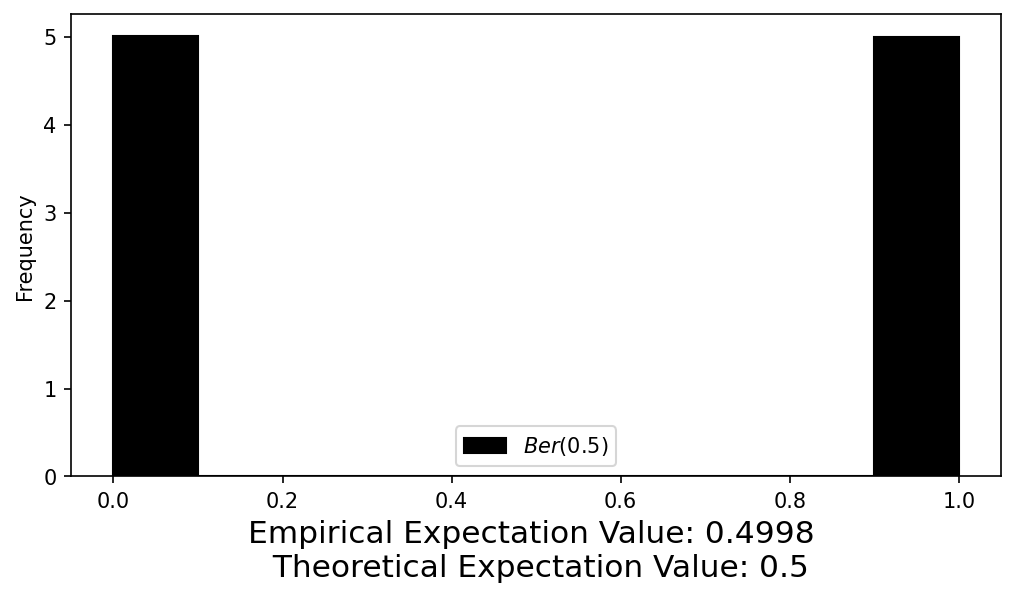

In [6]:
plt.figure(figsize=(8, 4), dpi=150)
plt.hist(
    bernoulli_random_variables,
    color="black",
    edgecolor="black",
    density=True,
    label=r"$Ber(0.5)$",
)
plt.xlabel(
    f"Empirical Expectation Value: {bernoulli_expectation:.4f} \n Theoretical Expectation Value: {Probability}",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Binomial distribution

$x\sim Bin(n,p)$ where $n = 10$ and $ p = 0.32$

let $x_i\sim \text{bern}(p)$, 
then $$\sum_{i=1}^{n}x_i\sim \text{bin}(n,p)$$

In [7]:
SampleSize = 1_000_000
P = 0.32
N = 10

Here sum of 10 $Ber(0.32)$ Random Variable is $Bin(10,0.32)$

In [8]:
def BernoulliToBinomial(number_of_trial: int, probability_of_success: float):
    binomial_random_variables = np.zeros(SampleSize, dtype=float)
    for n in range(number_of_trial):
        uniform_random_variables = np.random.uniform(size=SampleSize)
        bernoulli_random_variables = vUniformToBernoulli(
            uniform_random_variables, probability_of_success
        )
        binomial_random_variables = np.add(
            binomial_random_variables, bernoulli_random_variables
        )
    return binomial_random_variables

In [9]:
binomial_random_variable = BernoulliToBinomial(
    number_of_trial=N, probability_of_success=P
)

In [10]:
binomial_expectation = np.mean(binomial_random_variable)

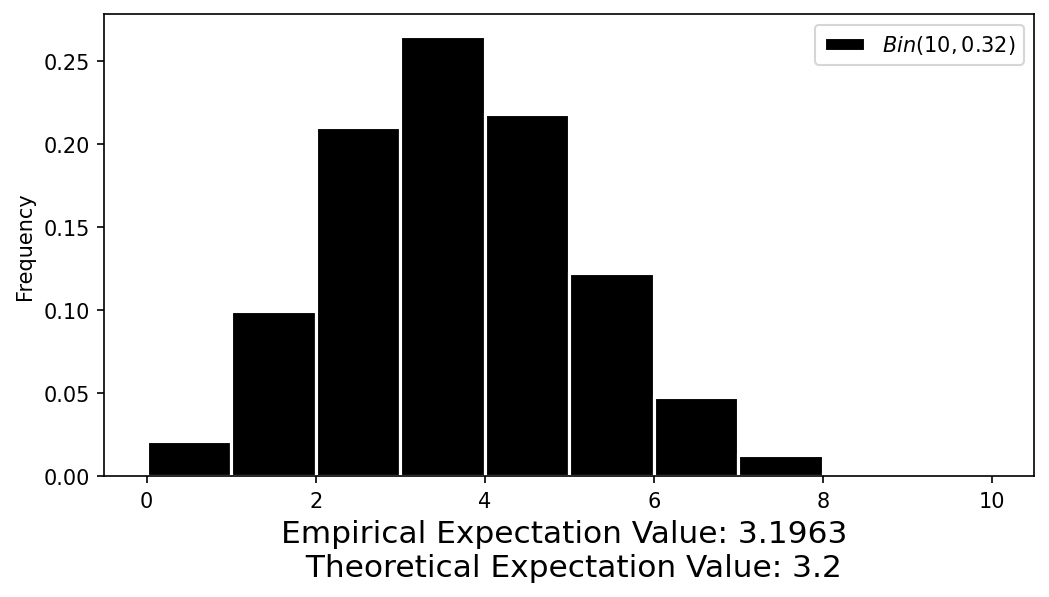

In [11]:
plt.figure(figsize=(8, 4), dpi=150)
plt.hist(
    binomial_random_variable,
    color="black",
    edgecolor="white",
    density=True,
    linewidth=1.5,
    label=r"$Bin(10,0.32)$",
)
plt.xlabel(
    f"Empirical Expectation Value: {binomial_expectation:.4f} \n Theoretical Expectation Value: {N*P}",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.legend()
plt.show()